Sample Point 1: Longitude = 126.9612598559906, Latitude = 36.424530633481744
Sample Point 2: Longitude = 126.89686571988888, Latitude = 35.08698099408794
Sample Point 3: Longitude = 127.86558132545069, Latitude = 35.4722501166085
Sample Point 4: Longitude = 127.22908506241272, Latitude = 37.65800868012456
Sample Point 5: Longitude = 128.28750520042374, Latitude = 37.80878397629759
Sample Point 6: Longitude = 128.9439349575803, Latitude = 36.87710454492155
Sample Point 7: Longitude = 128.90190808637854, Latitude = 35.72474816244839
Sample Point 8: Longitude = 127.96746463725732, Latitude = 36.64548665814616


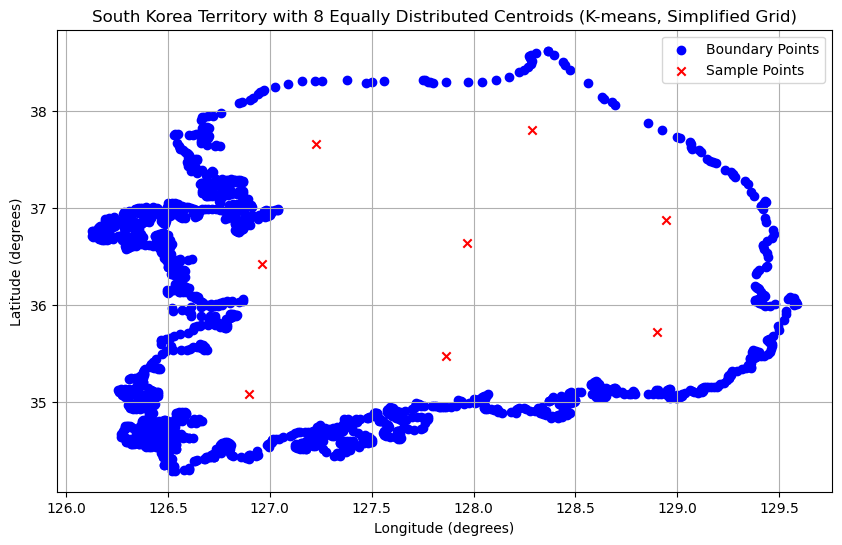

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import random
import pandas as pd

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Implementation of K-means algorithm
def k_means_with_iterations(points, k, max_iters=100):
    # Set the random seed for reproducibility (optional)
    #np.random.seed(42)

    # Step 1: Initialize centroids
    centroids = points[np.random.choice(points.shape[0], k, replace=False)]

    for iteration in range(max_iters):
        # Step 2: Assign points to the nearest centroid
        clusters = [[] for _ in range(k)]
        for point in points:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(point)

        # Step 3: Update centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i] 
                                  for i, cluster in enumerate(clusters)])

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            return clusters, centroids, iteration + 1

        centroids = new_centroids

    return clusters, centroids, iteration + 1

# Function to create a dense grid within a boundary
def create_dense_grid_within_boundary(polygon, grid_density=50):
    minx, miny, maxx, maxy = polygon.bounds
    x_points = np.linspace(minx, maxx, grid_density)
    y_points = np.linspace(miny, maxy, grid_density)
    grid_points = np.array([[x, y] for x in x_points for y in y_points if polygon.contains(Point(x, y))])
    return grid_points

# Load the dataset
file_path = 'South_Korea_territory.csv'  # Update this with the correct path to your CSV file
data = pd.read_csv(file_path)
longitude = data['Longitude (deg)']
latitude = data['Latitude (deg)']

# Create a polygon from the boundary points
polygon = Polygon(zip(longitude, latitude))

# Creating a dense grid of points within the boundary
dense_grid_points = create_dense_grid_within_boundary(polygon)

# Number of centroids (sample points)
k = 8

# Running the custom K-means algorithm with the simplified grid for initialization
clusters, centroids, iterations = k_means_with_iterations(dense_grid_points, k)

# Print the coordinates of the centroids
for i, centroid in enumerate(centroids):
    print(f"Sample Point {i+1}: Longitude = {centroid[0]}, Latitude = {centroid[1]}")
    
# Extracting longitude and latitude for final centroids
centroid_longitude = centroids[:, 0]
centroid_latitude = centroids[:, 1]

# Plotting the boundary with final centroids
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c='blue', marker='o', label='Boundary Points')
plt.scatter(centroid_longitude, centroid_latitude, c='red', marker='x', label='Sample Points')
plt.title('South Korea Territory with 8 Equally Distributed Centroids (K-means, Simplified Grid)')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.legend()
plt.grid(True)
plt.show()
